In [ ]:
# TP01 - UN PRIMER ENCUENTRO CON LA EPH – [Taller de Programación]
## Alumnos:  Kostzer Federico - Meza Palma Manuel Humberto - Pardini Maximiliano Gabriel - 
## Fecha: 6/10/2025

In [ ]:
Parte 1 - Familiarizandonos con la base EPH y limpieza

In [ ]:
2.a. A partir de ahora, cada grupo debe decidir trabajar con una región del país en específico y mantener dicha región en los próximos trabajos prácticos (ver variable REGION). Eliminen los datos de todas aquellas regiones que no se encuentren dentro de su región y unan ambos trimestres (2005 y 2025) en una sola base. 

In [1]:
!pip install openpyxl

In [2]:
# ==========================================================
# IMPORTAR LIBRERÍAS
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# ==========================================================
# 1️⃣ CARGAR BASES DE DATOS
# ==========================================================

# Rutas de archivos
ruta_2005 = r"C:\Users\Machi Pardini\Desktop\Taller de programación\TP1\usu_individual_T105.dta"
ruta_2025 = r"C:\Users\Machi Pardini\Desktop\Taller de programación\TP1\usu_individual_T125.xlsx"

# Cargar bases
base_2005 = pd.read_stata(ruta_2005)
base_2025 = pd.read_excel(ruta_2025, engine="openpyxl")

print("✔️ Bases cargadas correctamente:")
print(f"EPH 2005 → {base_2005.shape} | EPH 2025 → {base_2025.shape}\n")


✔️ Bases cargadas correctamente:
EPH 2005 → (47030, 176) | EPH 2025 → (45425, 235)



In [6]:
# ==========================================================
# 2️⃣ HOMOGENEIZAR NOMBRES DE COLUMNAS
# ==========================================================
for base in [base_2005, base_2025]:
    base.columns = [col.lower().strip() for col in base.columns]

# Verificación rápida
print("Columnas ejemplo 2005:", base_2005.columns[:5])
print("Columnas ejemplo 2025:", base_2025.columns[:5])


Columnas ejemplo 2005: Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4'], dtype='object')
Columnas ejemplo 2025: Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente'], dtype='object')


In [7]:
# ==========================================================
# 3️⃣ CONVERTIR REGION A CÓDIGOS NUMÉRICOS
# ==========================================================
region_dict = {
    'Gran Buenos Aires': 1, 'NOA': 40, 'NEA': 41, 'Cuyo': 42,
    'Pampeana': 43, 'Patagónica': 44
}

for base in [base_2005, base_2025]:
    if base['region'].dtype.name in ['object','category']:
        base['region_cod'] = base['region'].map(region_dict)
    else:
        base['region_cod'] = base['region']

# Verificación
print(base_2005[['region','region_cod']].head())


              region region_cod
0  Gran Buenos Aires          1
1  Gran Buenos Aires          1
2  Gran Buenos Aires          1
3  Gran Buenos Aires          1
4  Gran Buenos Aires          1


In [8]:
# ==========================================================
# 4️⃣ FILTRAR POR REGIÓN SELECCIONADA
# ==========================================================
region_seleccionada = 43  # Pampeana

base_2005_region = base_2005[base_2005['region_cod'] == region_seleccionada].copy()
base_2025_region = base_2025[base_2025['region_cod'] == region_seleccionada].copy()

# Agregar columna 'anio'
base_2005_region['anio'] = 2005
base_2025_region['anio'] = 2025

print("✔️ Registros filtrados por región:")
print(f"2005: {len(base_2005_region)} | 2025: {len(base_2025_region)}")


✔️ Registros filtrados por región:
2005: 14651 | 2025: 13803


In [9]:
# ==========================================================
# 5️⃣ UNIFICAR BASES POR REGIÓN
# ==========================================================
base_unida = pd.concat([base_2005_region, base_2025_region], ignore_index=True)
print(f"✔️ Base unificada → {base_unida.shape}")


✔️ Base unificada → (28454, 245)


In [ ]:
2.b. Asegúrense de que todas las variables tengan el formato correcto. Seleccione 15 variables de interés (entre las cuales tienen que estar: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF) y reporten en una figura de heatmap la cantidad de valores faltantes para cada año (NA, o NaN en Python) en una tabla por cada año. Comenten qué variables de las 15 que seleccionaron tienen más valores faltantes y qué año.  

In [10]:
# ==========================================================
# INCISO 2B: HOMOGENEIZAR TIPOS DE VARIABLES
# ==========================================================

# Lista de variables de interés
vars_interes = [
    'ch04','ch06','ch07','ch08','nivel_ed','estado',
    'cat_inac','ipcf','ch03','aglomerado','cat_ocup',
    'ch09','ch10','mas_500','decindr'
]

print("🔎 Detección y corrección de tipos:\n")

for col in vars_interes:
    if col in base_unida.columns:
        tipos = base_unida[col].dropna().map(type).value_counts()

        # Si hay más de un tipo, estandarizar a texto
        if len(tipos) > 1:
            print(f"⚠️ {col} tiene tipos mezclados:")
            print(tipos, "\n➡️ Corrigiendo a tipo 'str'...")
            base_unida[col] = base_unida[col].apply(
                lambda x: str(x).strip() if not pd.isna(x) else np.nan
            )
        else:
            print(f"✅ {col} tiene tipo único: {list(tipos.index)[0].__name__}")
        
        # Determinar cantidad de valores únicos (sin NaN)
        n_unicos = base_unida[col].nunique(dropna=True)

        # Si tiene pocos valores únicos, convertir a categoría
        if n_unicos <= 50:
            base_unida[col] = base_unida[col].astype('category')
            print(f"📊 {col} → convertido a categoría ({n_unicos} valores únicos)\n")
        else:
            print(f"ℹ️ {col} tiene {n_unicos} valores únicos, se mantiene sin cambios.\n")

    else:
        print(f"❌ {col} no está en la base.\n")

print("✨ Limpieza y conversión finalizada.")


🔎 Detección y corrección de tipos:

⚠️ ch04 tiene tipos mezclados:
ch04
<class 'str'>    14651
<class 'int'>    13803
Name: count, dtype: int64 
➡️ Corrigiendo a tipo 'str'...
📊 ch04 → convertido a categoría (4 valores únicos)

⚠️ ch06 tiene tipos mezclados:
ch06
<class 'float'>    14443
<class 'int'>      13803
<class 'str'>        208
Name: count, dtype: int64 
➡️ Corrigiendo a tipo 'str'...
ℹ️ ch06 tiene 199 valores únicos, se mantiene sin cambios.

⚠️ ch07 tiene tipos mezclados:
ch07
<class 'str'>    14651
<class 'int'>    13803
Name: count, dtype: int64 
➡️ Corrigiendo a tipo 'str'...
📊 ch07 → convertido a categoría (11 valores únicos)

⚠️ ch08 tiene tipos mezclados:
ch08
<class 'str'>      14651
<class 'float'>    13803
Name: count, dtype: int64 
➡️ Corrigiendo a tipo 'str'...
📊 ch08 → convertido a categoría (17 valores únicos)

⚠️ nivel_ed tiene tipos mezclados:
nivel_ed
<class 'str'>    14651
<class 'int'>    13803
Name: count, dtype: int64 
➡️ Corrigiendo a tipo 'str'...
📊 niv

In [11]:
## Unir base final
# Convertir region a int64
if 'region' in base_unida.columns:
    if base_unida['region'].dtype.name in ['object','category']:
        if 'region_cod' in base_unida.columns:
            base_unida['region'] = base_unida['region_cod'].astype('int64')
        else:
            mapa_region = {reg: i+1 for i, reg in enumerate(sorted(base_unida['region'].unique()))}
            base_unida['region'] = base_unida['region'].map(mapa_region).astype('int64')

# Verificación de tipos
print(base_unida[vars_interes + ['region']].dtypes)


ch04          category
ch06            object
ch07          category
ch08          category
nivel_ed      category
estado        category
cat_inac      category
ipcf           float64
ch03          category
aglomerado    category
cat_ocup      category
ch09          category
ch10          category
mas_500       category
decindr       category
region           int64
dtype: object


In [12]:
## Determinar valores unicos de variables
# Lista de variables de interés
vars_interes = [
    'ch04','ch06','ch07','ch08','nivel_ed','estado',
    'cat_inac','ipcf','ch03','aglomerado','cat_ocup',
    'ch09','ch10','mas_500','decindr'
]

# Mostrar valores únicos de forma ordenada
for var in vars_interes:
    print(f"\n🔹 Valores únicos de {var}:")
    if var in base_unida.columns:
        valores = base_unida[var].dropna().unique()
        print(sorted(valores))
    else:
        print("⚠️ Variable no encontrada en la base.")



🔹 Valores únicos de ch04:
['1', '2', 'Mujer', 'Varón']

🔹 Valores únicos de ch06:
['-1', '1', '1.0', '10', '10.0', '101', '102', '11', '11.0', '12', '12.0', '13', '13.0', '14', '14.0', '15', '15.0', '16', '16.0', '17', '17.0', '18', '18.0', '19', '19.0', '2', '2.0', '20', '20.0', '21', '21.0', '22', '22.0', '23', '23.0', '24', '24.0', '25', '25.0', '26', '26.0', '27', '27.0', '28', '28.0', '29', '29.0', '3', '3.0', '30', '30.0', '31', '31.0', '32', '32.0', '33', '33.0', '34', '34.0', '35', '35.0', '36', '36.0', '37', '37.0', '38', '38.0', '39', '39.0', '4', '4.0', '40', '40.0', '41', '41.0', '42', '42.0', '43', '43.0', '44', '44.0', '45', '45.0', '46', '46.0', '47', '47.0', '48', '48.0', '49', '49.0', '5', '5.0', '50', '50.0', '51', '51.0', '52', '52.0', '53', '53.0', '54', '54.0', '55', '55.0', '56', '56.0', '57', '57.0', '58', '58.0', '59', '59.0', '6', '6.0', '60', '60.0', '61', '61.0', '62', '62.0', '63', '63.0', '64', '64.0', '65', '65.0', '66', '66.0', '67', '67.0', '68', '68.0'

In [13]:
# Convertir todo a string, minúscula y quitar espacios
base_unida['ch04'] = base_unida['ch04'].astype(str).str.lower().str.strip()

# Reemplazar etiquetas por códigos
base_unida['ch04'] = base_unida['ch04'].replace({
    'varón': 1,
    'varon': 1,  # por si hay acento o no
    'mujer': 2,
    '1': 1,
    '2': 2
}).astype('Int64')  # nullable int para soportar NaN

# Verificar valores únicos
print(base_unida['ch04'].value_counts(dropna=False))


ch04
2    14884
1    13570
Name: count, dtype: Int64


C:\Users\Machi Pardini\AppData\Local\Temp\ipykernel_32764\1842915813.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_unida['ch04'] = base_unida['ch04'].replace({


In [14]:
## Recodificar de forma unica variables categoricas

# Diccionarios de mapeo
mappings = { 'ch07': {
        'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3,
        'Viudo': 4, 'Soltero': 5
    },
    
    'ch08': {
        'Obra social (incluye PAMI)': 1,
        'Mutual/Prepaga/Servicio de emergencia': 2,
        'Planes y seguros públicos': 3,
        'No paga ni le descuentan': 4,
        'Ns/Nr': 9,
        'Obra social y mutual/prepaga/servicio de emergencia': 12,
        'Obra social y planes y seguros públicos': 13,
        'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
        'Obra social, mutual/prepaga/servicio de emergencia y planes': 123
    },
    
    'nivel_ed': {
        'Primaria Incompleta (incluye educación especial)': 1,
        'Primaria Completa': 2,
        'Secundaria Incompleta': 3,
        'Secundaria Completa': 4,
        'Superior Universitaria Incompleta': 5,
        'Superior Universitaria Completa': 6,
        'Sin instrucción': 7
    },
    
    'estado': {
        'Entrevista individual no realizada (no respuesta al cuestion)': 0,
        'Ocupado': 1,
        'Desocupado': 2,
        'Inactivo': 3,
        'Menor de 10 años': 4
    },
    
    'cat_inac': {
        'Jubilado/pensionado': 1,
        'Rentista': 2,
        'Estudiante': 3,
        'Ama de casa': 4,
        'Menor de 6 años': 5,
        'Discapacitado': 6,
        'Otros': 7
    },
    
    'ch03': {
        'Jefe': 1,
        'Cónyuge/Pareja': 2,
        'Hijo/Hijastro': 3,
        'Yerno/Nuera': 4,
        'Nieto': 5,
        'Madre/Padre': 6,
        'Suegro': 7,
        'Hermano': 8,
        'Otros familiares': 9,
        'No familiares': 10
    },
    
    'aglomerado': {
        'Gran La Plata': 2, 'Bahía Blanca - Cerri': 3, 'Gran Rosario': 4,
        'Gran Santa Fe': 5, 'Gran Paraná': 6, 'Gran Córdoba': 13, 'Concordia': 14,
        'Santa Rosa - Toay': 30, 'Mar del Plata - Batán': 34, 'Río Cuarto': 36
        # Faltaba el 38, agregalo si sabes la etiqueta
    },
    
    'cat_ocup': {
        'Patrón': 1,
        'Cuenta propia': 2,
        'Obrero o empleado': 3,
        'Trabajador familiar sin remuneración': 4
    },
    
    'ch09': {
        'Sí': 1,
        'No': 2,
        'Menor de 2 años': 3
    },
    
    'ch10': {
        'Sí, asiste': 1,
        'No asiste, pero asistió': 2,
        'Nunca asistió': 3,
        '0.0': 0  # opcional, si hay 0.0
    }
}

# Aplicar los mapeos a las columnas
for col, mapping in mappings.items():
    if col in base_unida.columns:
        base_unida[col] = base_unida[col].replace(mapping)
        # Convertir todo a número
        base_unida[col] = pd.to_numeric(base_unida[col], errors='coerce')


C:\Users\Machi Pardini\AppData\Local\Temp\ipykernel_32764\923467574.py:93: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  base_unida[col] = base_unida[col].replace(mapping)


In [85]:
## Limpieza de mas_500 y decindr y homogenizacion de tipos de datos

# Variables categóricas de interés
vars_categoricas = [
    'ch07','ch08','nivel_ed','estado','cat_inac',
    'ch03','aglomerado','cat_ocup','ch09','ch10'
]

# Limpieza de mas_500 (dummy 0/1)
if 'mas_500' in base_unida.columns:
    base_unida['mas_500'] = base_unida['mas_500'].replace({'N': 0, 'S': 1}).astype(int)

# Limpieza de decindr
if 'decindr' in base_unida.columns:
    base_unida['decindr'] = base_unida['decindr'].astype(str).str.strip()
    base_unida['decindr'] = base_unida['decindr'].str.lstrip('0')
    base_unida['decindr'] = base_unida['decindr'].replace({'': '0'})
    base_unida['decindr'] = pd.to_numeric(base_unida['decindr'], errors='coerce')
    base_unida.loc[base_unida['decindr'] > 13, 'decindr'] = pd.NA
    base_unida['decindr'] = base_unida['decindr'].astype('category')  # ordinal

# Convertir otras variables categóricas a tipo category
for col in vars_categoricas:
    if col in base_unida.columns:
        # Quitar espacios si son string
        if base_unida[col].dtype == 'object':
            base_unida[col] = base_unida[col].str.strip()
        # Convertir a category
        base_unida[col] = base_unida[col].astype('category')


# Verificación rápida
print("\nTipos de variables tras limpieza:")
print(base_unida.dtypes[['mas_500','decindr','ch04'] + vars_categoricas])



Tipos de variables tras limpieza:
mas_500          int64
decindr       category
ch04             Int64
ch07          category
ch08          category
nivel_ed      category
estado        category
cat_inac      category
ch03          category
aglomerado    category
cat_ocup      category
ch09          category
ch10          category
dtype: object


C:\Users\betam\AppData\Local\Temp\ipykernel_18124\3208428942.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_unida['mas_500'] = base_unida['mas_500'].replace({'N': 0, 'S': 1}).astype(int)
C:\Users\betam\AppData\Local\Temp\ipykernel_18124\3208428942.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  base_unida['mas_500'] = base_unida['mas_500'].replace({'N': 0, 'S': 1}).astype(int)


C:\Users\Machi Pardini\AppData\Local\Temp\ipykernel_32764\202530372.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes = base_unida[vars_interes + ['anio']].groupby('anio').apply(lambda df: df.isna().sum()).T


Cantidad de valores faltantes por variable y año:
anio        2005  2025
ch04           0     0
ch06           0     0
ch07           1     0
ch08          21     0
nivel_ed       0     0
estado        24     0
cat_inac       0     0
ipcf           0     0
ch03           0     0
aglomerado     0     0
cat_ocup       0     0
ch09           0     0
ch10           0     0
mas_500        0     0
decindr        0     0
anio           0     0

🔹 Año 2005:
Variable con más NA → estado (24 NA)

🔹 Año 2025:
Variable con más NA → ch04 (0 NA)


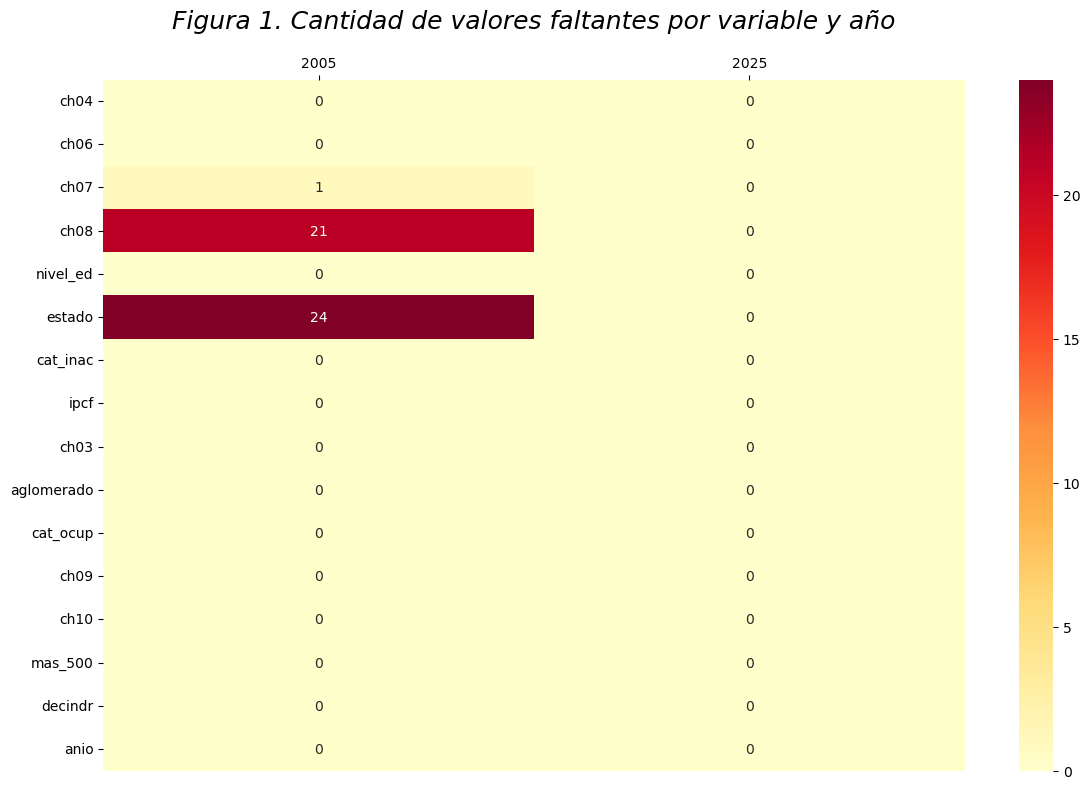

In [15]:
# ==========================================================
# INCISO 2B: HEATMAP DE VALORES FALTANTES + VARIABLES MÁS AFECTADAS
# ==========================================================

# Calcular valores faltantes por año
faltantes = base_unida[vars_interes + ['anio']].groupby('anio').apply(lambda df: df.isna().sum()).T

# Mostrar tabla completa
print("Cantidad de valores faltantes por variable y año:")
print(faltantes)

# Identificar variable con más NA por año
max_na_por_anio = faltantes.idxmax()
cantidad_max_na_por_anio = faltantes.max()
for anio in faltantes.columns:
    print(f"\n🔹 Año {anio}:")
    print(f"Variable con más NA → {max_na_por_anio[anio]} ({cantidad_max_na_por_anio[anio]} NA)")
plt.figure(figsize=(12,8))
ax = sns.heatmap(faltantes, annot=True, fmt='d', cmap='YlOrRd',
                 cbar_kws={'label': 'Cantidad de NA'})

# Título
plt.title(
    'Figura 1. Cantidad de valores faltantes por variable y año',  #
    fontsize=18,        
    fontstyle='italic', 
    loc='center',        
    pad=20               
)


# Quitar etiqueta del eje X
ax.set_xlabel('')  

# Mover los nombres del eje X arriba
ax.xaxis.tick_top()             # Mueve las etiquetas arriba
ax.xaxis.set_label_position('top')  # (opcional) mueve la etiqueta del eje también arriba

# Mantener etiqueta del eje Y
ax.set_ylabel('')
ax.collections[0].colorbar.set_label('')

plt.tight_layout()
plt.show()


In [ ]:
2.c.	Corregir variables si notan valores sin sentido (como ingresos negativos) de acuerdo a la documentación de la EPH (puede ser una codificación de no respuesta de los individuos) y eliminen estos valores extraños de sus 15 variables de interés. Comenten brevemente en el reporte dicho proceso de limpieza.

In [16]:
# ==========================================================
# INCISO 2C: LIMPIEZA DE VARIABLES DE INTERÉS
# ==========================================================

# Lista de variables numéricas de interés
vars_numericas = ['ch04','ch06','ch07','ch08','nivel_ed','estado',
                  'cat_inac','ipcf','ch03','aglomerado','cat_ocup','ch09','ch10']

# Crear copia para no alterar la base original
base_limpia = base_unida.copy()

# Definir condiciones de limpieza (ejemplo: ingresos negativos, códigos de no respuesta)
# Según documentación EPH: valores negativos suelen indicar "no responde" o "no aplica"
# Vamos a aplicar limpieza solo a las variables numéricas
for var in vars_numericas:
    if var in base_limpia.columns:
        # Convertir a numeric en caso de que no lo sea
        base_limpia[var] = pd.to_numeric(base_limpia[var], errors='coerce')
        # Eliminar valores negativos
        n_invalidos = (base_limpia[var] < 0).sum()
        if n_invalidos > 0:
            print(f"Variable {var}: {n_invalidos} valores negativos reemplazados por NaN")
            base_limpia.loc[base_limpia[var] < 0, var] = np.nan

# Verificación: mostrar primeras filas y conteo de NA por variable
print("\nConteo de NA después de limpieza:")
print(base_limpia[vars_numericas].isna().sum())


Variable ch06: 86 valores negativos reemplazados por NaN

Conteo de NA después de limpieza:
ch04            0
ch06          294
ch07            1
ch08           21
nivel_ed        0
estado         24
cat_inac        0
ipcf            0
ch03            0
aglomerado      0
cat_ocup        0
ch09            0
ch10            0
dtype: int64


In [ ]:
Parte II: Primer Análisis Exploratorio

In [ ]:
3.	Realicen un gráfico de barras mostrando la composición por sexo para 2005 y 2025 en su región. Comenten los resultados.

📊 Porcentaje de personas por sexo en la región seleccionada:


sexo,Mujer,Varón
2005,51.52,48.48
2025,56.19,43.81



📈 Diferencia porcentual 2025 vs 2005:


,Diferencia (%)
sexo,
Mujer,4.67
Varón,-4.67


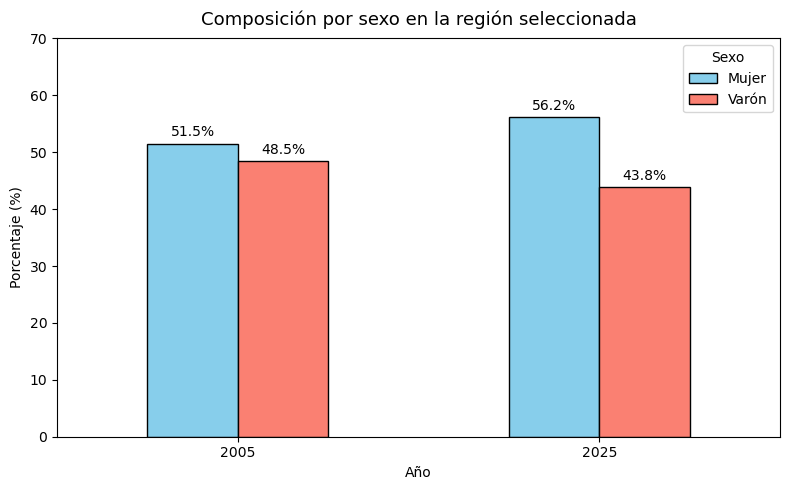

In [22]:
# ==========================================================
# INCISO 3️⃣: COMPOSICIÓN POR SEXO – CON ETIQUETAS DE %
# ==========================================================

# Asegurarse de que la variable sexo exista y esté en formato categórico
if 'ch06' in base_limpia.columns:  # ch06 = sexo
    base_limpia['sexo'] = base_limpia['ch06'].map({1: 'Varón', 2: 'Mujer'}).astype('category')

# Filtrar por año
base_2005_sexo = base_limpia[base_limpia['anio'] == 2005]
base_2025_sexo = base_limpia[base_limpia['anio'] == 2025]

# Contar frecuencia por sexo
freq_2005 = base_2005_sexo['sexo'].value_counts(normalize=True) * 100
freq_2025 = base_2025_sexo['sexo'].value_counts(normalize=True) * 100

# =============================
# 📊 RESULTADOS TABULARES
# =============================
tabla_sexo = pd.concat([
    freq_2005.rename('2005'),
    freq_2025.rename('2025')
], axis=1).T.round(2)

print("📊 Porcentaje de personas por sexo en la región seleccionada:")
display(tabla_sexo)

# Diferencia porcentual entre años
tabla_sexo_diff = (tabla_sexo.loc['2025'] - tabla_sexo.loc['2005']).rename('Diferencia (%)').to_frame()
print("\n📈 Diferencia porcentual 2025 vs 2005:")
display(tabla_sexo_diff)

# Crear dataframe para graficar
df_sexo = pd.DataFrame({'2005': freq_2005, '2025': freq_2025}).T

# Gráfico de barras
ax = df_sexo.plot(
    kind='bar',
    figsize=(8,5),
    color=['skyblue','salmon'],
    edgecolor='black'
)

plt.title('Composición por sexo en la región seleccionada', fontsize=13, pad=10)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.ylim(0, 70)

# Añadir etiquetas de porcentaje encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


In [ ]:
4.	Realicen una matriz de correlación para 2005 y 2025 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Crear las variables dicotómicas binarias necesarias (variables dummies) y renombrar dichas variables para que las etiquetas tengan sentido en el gráfico de correlación. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlación. Comenten los resultados. 


🔹 Top 5 correlaciones más fuertes en 2005:


estado 4.0  cat inac 5.0    0.74
ch06        cat inac 1.0    0.56
nivel ed    cat inac 5.0    0.53
ch07        cat inac 3.0    0.50
estado 3.0  cat inac 4.0    0.41
dtype: float64


🔹 Top 5 correlaciones más fuertes en 2025:


estado 4.0  cat inac 5.0    0.69
ch06        cat inac 1.0    0.56
ch07        cat inac 3.0    0.49
estado 3.0  cat inac 1.0    0.43
            cat inac 4.0    0.39
dtype: float64

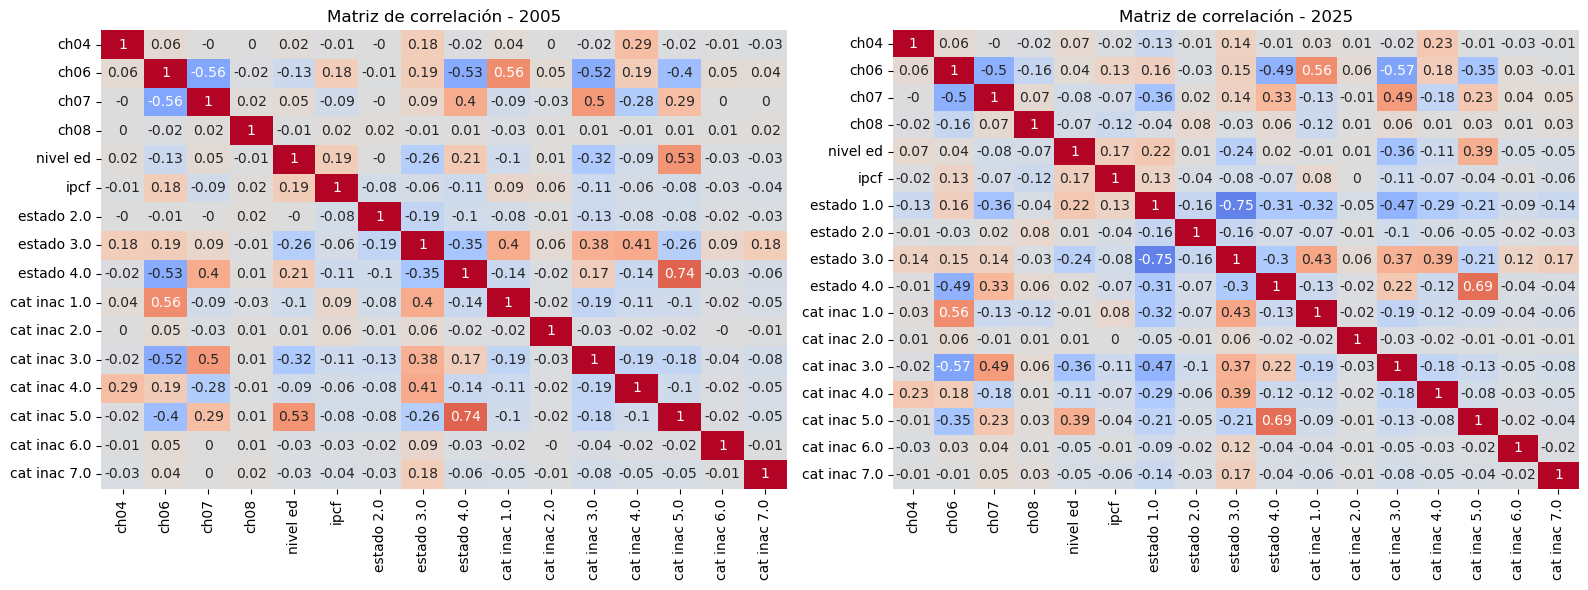

In [25]:
# ==========================================================
# INCISO 4️⃣: MATRIZ DE CORRELACIÓN – RESULTADOS
# ==========================================================

# Calcular matrices numéricas
corr_2005 = base_2005_corr.corr().round(2)
corr_2025 = base_2025_corr.corr().round(2)

# -------------------------------
# TOP 5 correlaciones más fuertes
# -------------------------------
def top_correlations(corr_df, n=5):
    corr_pairs = (
        corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
    )
    return corr_pairs.head(n)

print("\n🔹 Top 5 correlaciones más fuertes en 2005:")
display(top_correlations(corr_2005))

print("\n🔹 Top 5 correlaciones más fuertes en 2025:")
display(top_correlations(corr_2025))

# -------------------------------
# Visualización: Heatmaps lado a lado
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_2005, ax=axes[0], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
axes[0].set_title("Matriz de correlación - 2005")

sns.heatmap(corr_2025, ax=axes[1], annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
axes[1].set_title("Matriz de correlación - 2025")

plt.tight_layout()
plt.show()


In [ ]:
Parte III: Conociendo a los pobres y no pobres.

In [ ]:
5.	Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su ingreso total familiar (ITF). Las observaciones con ITF=0 guárdenlas en una base bajo el nombre norespondieron.

In [91]:
# ==========================================================
# INCISO 5️⃣: PERSONAS QUE RESPONDIERON O NO RESPONDIERON ITF
# ==========================================================

# Ajustamos a numeric por si hubiera inconsistencias
base_limpia['ipcf'] = pd.to_numeric(base_limpia['ipcf'], errors='coerce')

# Base de personas que respondieron ITF (IPCF > 0)
respondieron = base_limpia[base_limpia['ipcf'] > 0].copy()

# Base de personas que no respondieron ITF (IPCF = 0 o NA)
norespondieron = base_limpia[base_limpia['ipcf'].fillna(0) == 0].copy()

# Conteo por año
conteo_respondieron = respondieron.groupby('anio').size()
conteo_norespondieron = norespondieron.groupby('anio').size()

print("🔹 Personas que respondieron ITF:")
print(conteo_respondieron)
print("\n🔹 Personas que NO respondieron ITF:")
print(conteo_norespondieron)


🔹 Personas que respondieron ITF:
anio
2005    14481
2025     9340
dtype: int64

🔹 Personas que NO respondieron ITF:
anio
2005     170
2025    4463
dtype: int64


In [ ]:
6.	Utilizando el archivo tabla_adulto_equiv.xlsx, agreguen a su base de datos una columna llamada adulto_equiv que contenga los valores de adulto equivalente de cada persona según su sexo y edad (por ejemplo, a un varón de 2 años le corresponde 0.46). Finalmente, con el comando groupby sumen esta nueva columna para las personas que pertenecen a un mismo hogar y guarden ese dato en una columna llamada ad_equiv_hogar .

In [79]:
# ==========================================================
# INCISO 6️⃣: CALCULO DE ADULTOS EQUIVALENTES
# ==========================================================

# BLOQUE 1: Cargar y limpiar la tabla de adultos equivalentes

import pandas as pd
import numpy as np

ruta_tabla = r"C:\Users\Machi Pardini\Desktop\Taller de programación\TP1\tabla_adulto_equiv.xlsx"
tabla_adulto = pd.read_excel(ruta_tabla, skiprows=4)  # saltamos filas innecesarias
tabla_adulto.columns = ['edad', 'mujeres', 'varones']

print("Primeras filas de tabla de adultos equivalentes:")
print(tabla_adulto.head())

Primeras filas de tabla de adultos equivalentes:
             edad  mujeres  varones
0  Menor de 1 año     0.35     0.35
1            1año     0.37     0.37
2          2 años     0.46     0.46
3          3 años     0.51     0.51
4          4 años     0.55     0.55


In [80]:
# ================================
# BLOQUE 2: Transformar tabla a formato largo
# ================================
tabla_adulto['edad'] = tabla_adulto['edad'].astype(str).str.strip()

tabla_adulto_melt = tabla_adulto.melt(
    id_vars='edad', 
    value_vars=['mujeres', 'varones'], 
    var_name='sexo_texto', 
    value_name='adulto_equiv'
)

print("Primeras filas de tabla en formato largo:")
print(tabla_adulto_melt.head(10))


Primeras filas de tabla en formato largo:
             edad sexo_texto  adulto_equiv
0  Menor de 1 año    mujeres          0.35
1            1año    mujeres          0.37
2          2 años    mujeres          0.46
3          3 años    mujeres          0.51
4          4 años    mujeres          0.55
5          5 años    mujeres          0.60
6          6 años    mujeres          0.64
7          7 años    mujeres          0.66
8          8 años    mujeres          0.68
9          9 años    mujeres          0.69


In [81]:
# ================================
# BLOQUE 3: Preparar base respondieron
# ================================
respondieron['sexo_texto'] = respondieron['ch06'].map({1: 'varones', 2: 'mujeres'})
respondieron['edad_str'] = respondieron['edad_str'].astype(str).str.strip()

print("Revisión de columnas de edad y sexo:")
print(respondieron[['ch03', 'ch06', 'edad_str', 'sexo_texto']].head(10))

Revisión de columnas de edad y sexo:
   ch03  ch06 edad_str sexo_texto
0   NaN  28.0      nan        NaN
1   NaN  30.0      nan        NaN
2   NaN   4.0      nan        NaN
3   NaN  66.0      nan        NaN
4   NaN  60.0      nan        NaN
5   NaN  29.0      nan        NaN
6   NaN  26.0      nan        NaN
7   NaN  33.0      nan        NaN
8   NaN  25.0      nan        NaN
9   NaN   1.0      nan    varones


In [82]:
# ================================
# BLOQUE 4: Asignar adulto_equiv a cada persona
# ================================
respondieron = respondieron.merge(
    tabla_adulto_melt,
    left_on=['edad_str', 'sexo_texto'],
    right_on=['edad', 'sexo_texto'],
    how='left',
    suffixes=('', '_tabla')
)

respondieron['adulto_equiv'] = respondieron['adulto_equiv'].fillna(1)

print("Verificación de adulto_equiv asignado:")
print(respondieron[['edad_str', 'sexo_texto', 'adulto_equiv']].head(10))

Verificación de adulto_equiv asignado:
  edad_str sexo_texto  adulto_equiv
0      nan        NaN           1.0
1      nan        NaN           1.0
2      nan        NaN           1.0
3      nan        NaN           1.0
4      nan        NaN           1.0
5      nan        NaN           1.0
6      nan        NaN           1.0
7      nan        NaN           1.0
8      nan        NaN           1.0
9      nan    varones           1.0


In [83]:
# ================================
# BLOQUE 5: Sumar adulto_equiv por hogar
# ================================
respondieron['ad_equiv_hogar'] = respondieron.groupby('codusu')['adulto_equiv'].transform('sum')

print("Verificación de adultos equivalentes por hogar:")
print(respondieron[['codusu', 'adulto_equiv', 'ad_equiv_hogar']].head(10))

Verificación de adultos equivalentes por hogar:
     codusu  adulto_equiv  ad_equiv_hogar
0  125082             1.0             3.0
1  125082             1.0             3.0
2  125082             1.0             3.0
3  125283             1.0             4.0
4  125283             1.0             4.0
5  125283             1.0             4.0
6  125283             1.0             4.0
7  125409             1.0             8.0
8  125409             1.0             8.0
9  125409             1.0             8.0


In [ ]:
7.	Sabiendo que la Canasta Básica Total para un adulto equivalente en el primer trimestre de 2025 es aproximadamente $365.177, agreguen a la base respondieron una columna llamada ingreso_necesario que sea el producto de este valor por ad_equiv_hogar. Para el primer trimestre de 2005 la Canasta Básica Total para un adulto equivalente era aproximadamente $205,07. Note que este es el valor mínimo que necesita ese hogar para no ser pobre.

In [84]:
# ==============================
# 7️⃣ INCISO 7: Calcular ingreso necesario por hogar
# ==============================

# Valores de la Canasta Básica Total por adulto equivalente
CBT_2025 = 365177   # primer trimestre de 2025
CBT_2005 = 205.07   # primer trimestre de 2005

# Agregar columna ingreso_necesario para 2025
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * CBT_2025

# Verificamos primeras filas
respondieron[['codusu', 'ad_equiv_hogar', 'ingreso_necesario']].head(10)



,codusu,ad_equiv_hogar,ingreso_necesario
0,125082,3.0,1095531.0
1,125082,3.0,1095531.0
2,125082,3.0,1095531.0
3,125283,4.0,1460708.0
4,125283,4.0,1460708.0
5,125283,4.0,1460708.0
6,125283,4.0,1460708.0
7,125409,8.0,2921416.0
8,125409,8.0,2921416.0
9,125409,8.0,2921416.0


In [ ]:
8.	Por último, agreguen a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. ¿Cuántos pobres identificaron para cada año? ¿Qué porcentaje de la muestra representa?

In [89]:
# ==============================
# 8️⃣ INCISO 8: Identificar hogares pobres 
# ==============================

# Crear columna 'pobre': 1 si ITF < ingreso_necesario, 0 si no
respondieron['pobre'] = np.where(respondieron['itf'] < respondieron['ingreso_necesario'], 1, 0)

# Cantidad de pobres
num_pobres = respondieron['pobre'].sum()

# Porcentaje de la muestra
porc_pobres = respondieron['pobre'].mean() * 100

print(f"Cantidad de pobres: {num_pobres}")
print(f"Porcentaje de la muestra: {porc_pobres:.2f}%")


Cantidad de pobres: 20859
Porcentaje de la muestra: 80.49%


In [ ]:
9.	(Opcional) Muestren estadísticas descriptivas relevantes de pobre en una tabla, comparando 2005 con 2025. Además, hagan 2 gráficos exploratorios a elección usando la variable pobre. Comenten. tulo

In [97]:
# ============================== 
# 9️⃣ INCISO OPCIONAL: Estadísticas descriptivas y gráficos de pobreza 
# ==============================

# 🔹 Estadísticas descriptivas básicas de la variable 'pobre'
# Contamos cuántos pobres y no pobres
stats_pobre = respondieron['pobre'].value_counts().rename_axis('pobre').reset_index(name='cantidad')

# Calculamos porcentaje
stats_pobre['porcentaje'] = stats_pobre['cantidad'] / stats_pobre['cantidad'].sum() * 100

# Mostramos tabla
print(stats_pobre)


   pobre  cantidad  porcentaje
0      1     20859   80.486958
1      0      5057   19.513042


C:\Users\Machi Pardini\AppData\Local\Temp\ipykernel_31656\1796501086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pobre', data=respondieron, palette='Set2')


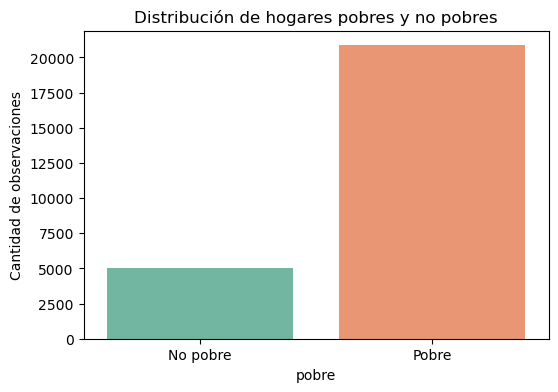

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Conteo de pobres
plt.figure(figsize=(6,4))
sns.countplot(x='pobre', data=respondieron, palette='Set2')
plt.xticks([0,1], ['No pobre','Pobre'])
plt.title('Distribución de hogares pobres y no pobres')
plt.ylabel('Cantidad de observaciones')
plt.show()


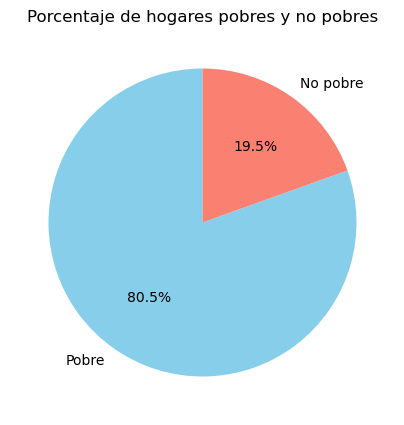

In [96]:
plt.figure(figsize=(5,5))
plt.pie(respondieron['pobre'].value_counts(), labels=['Pobre','No pobre'], 
        autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90)
plt.title('Porcentaje de hogares pobres y no pobres')
plt.show()
